# Обработка данных

Импортируем необходимые модули:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
%matplotlib inline

In [3]:
data_normal1 = pd.read_csv("normal1.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['A1(X)',	'A1(Y)',	'A2(X)',	'A2(Y)',	'A3(X)',	'A3(Y)',	'B3(X)',	'B3(Y)',	'B2(X)',	'B2(Y)'])

Каждый столбец X убираем, так как каждая строка соответсвует отдельному моменту времени, числовые значения которых мы не будем использовать

In [4]:
data_normal1 = data_normal1.drop(labels=["A1(X)", "A2(X)", "A3(X)", "B3(X)", "B2(X)"], axis=1)

In [5]:
data_normal2 = pd.read_csv("normal2.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['D1(X)',	'D1(Y)',	'D3(X)',	'D3(Y)',	'D4(X)',	'D4(Y)',	'C3(X)',	'C3(Y)',	'C2(X)',	'C2(Y)'])

In [6]:
data_normal2 = data_normal2.drop(labels=["D1(X)", "D3(X)", "D4(X)", "C3(X)", "C2(X)"], axis=1)

In [7]:
data_normal3 = pd.read_csv("normal3.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['E2(X)',	'E2(Y)',	'E3(X)',	'E3(Y)',	'E4(X)',	'E4(Y)',	'F1(X)',	'F1(Y)',	'F3(X)',	'F3(Y)'])

In [8]:
data_normal3 = data_normal3.drop(labels=["E2(X)", "E3(X)", "E4(X)", "F1(X)", "F3(X)"], axis=1)

In [9]:
data_normal4 = pd.read_csv("normal4.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['F4(X)',	'F4(Y)',	'F5(X)',	'F5(Y)',	'G3(X)',	'G3(Y)',	'G2(X)',	'G2(Y)'])

In [10]:
data_normal4 = data_normal4.drop(labels=["F4(X)", "F5(X)", "G3(X)", "G2(X)"], axis=1)

In [11]:
data_normal5 = pd.read_csv("normal5.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['H2(X)',	'H2(Y)',	'H3(X)',	'H3(Y)',	'H4(X)',	'H4(Y)',	'J3(X)',	'J3(Y)'])

In [12]:
data_normal5 = data_normal5.drop(labels=["H2(X)", "H3(X)", "H4(X)", "J3(X)"], axis=1)

Соединяем все фрагменты и получаем целый массив данных для нормы.

In [13]:
data_normal = pd.concat([data_normal1, data_normal2, data_normal3, data_normal4, data_normal5], axis=1)

Переименуем все столбцы:

In [14]:
new_columns = []
for i in range(len(data_normal.columns)):
    new_columns.append(data_normal.columns[i][:2])
data_normal.columns = new_columns

Теперь считываем данные при аритмии:

In [15]:
data_arrhythmia1 = pd.read_csv("arrhythmia1.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['A1(X)',	'A1(Y)',	'A2(X)',	'A2(Y)',	'A3(X)',	'A3(Y)',	'B3(X)',	'B3(Y)',	'B2(X)',	'B2(Y)'])

In [16]:
data_arrhythmia1 = data_arrhythmia1.drop(labels=["A1(X)", "A2(X)", "A3(X)", "B3(X)", "B2(X)"], axis=1)

In [17]:
data_arrhythmia2 = pd.read_csv("arrhythmia2.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['D1(X)',	'D1(Y)',	'D3(X)',	'D3(Y)',	'D4(X)',	'D4(Y)',	'C3(X)',	'C3(Y)',	'C2(X)',	'C2(Y)'])

In [18]:
data_arrhythmia2 = data_arrhythmia2.drop(labels=["D1(X)", "D3(X)", "D4(X)", "C3(X)", "C2(X)"], axis=1)

In [19]:
data_arrhythmia3 = pd.read_csv("arrhythmia3.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['E2(X)',	'E2(Y)',	'E3(X)',	'E3(Y)',	'E4(X)',	'E4(Y)',	'F1(X)',	'F1(Y)',	'F3(X)',	'F3(Y)'])

In [20]:
data_arrhythmia3 = data_arrhythmia3.drop(labels=["E2(X)", "E3(X)", "E4(X)", "F1(X)", "F3(X)"], axis=1)

In [21]:
data_arrhythmia4 = pd.read_csv("arrhythmia4.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['F4(X)',	'F4(Y)',	'F5(X)',	'F5(Y)',	'G3(X)',	'G3(Y)',	'G2(X)',	'G2(Y)'])

In [22]:
data_arrhythmia4 = data_arrhythmia4.drop(labels=["F4(X)", "F5(X)", "G3(X)", "G2(X)"], axis=1)

In [23]:
data_arrhythmia5 = pd.read_csv("arrhythmia5.dat", 
                 sep="\t+", 
                 skiprows=1,
                 engine='python',
                 names=['H2(X)',	'H2(Y)',	'H3(X)',	'H3(Y)',	'H4(X)',	'H4(Y)',	'J3(X)',	'J3(Y)'])

In [24]:
data_arrhythmia5 = data_arrhythmia5.drop(labels=["H2(X)", "H3(X)", "H4(X)", "J3(X)"], axis=1)

Соединяем все фрагменты и получаем целый массив данных для аритмии.

In [25]:
data_arrhythmia = pd.concat([data_arrhythmia1, data_arrhythmia2, data_arrhythmia3, data_arrhythmia4, data_arrhythmia5], axis=1)

In [26]:
new_columns = []
for i in range(len(data_arrhythmia.columns)):
    new_columns.append(data_arrhythmia.columns[i][:2])
data_arrhythmia.columns = new_columns

# Поиск длин интервалов RR и значений напряжений пиков R

Находим зубцы R для всех электродов в норме, выставляем минимальную дистанцию между пиками = 300:

In [27]:
peaks_normal = []

for col in data_normal.columns:
    l = len(data_normal[col])
    # l = 2000
    threshold = 5000

    x, _ = find_peaks(data_normal.head(l)[col], height=threshold, distance=300)
    peaks_normal.append(x)

Находим RR-интервалы в норме

In [28]:
intervals_normal = []

for col in range(0, len(data_normal.columns)):
    t = []
    for x in range(0, len(peaks_normal[col]) - 1):
        t.append(peaks_normal[col][x + 1] - peaks_normal[col][x])
    intervals_normal.append(t)

Находим пики R для всех электродов при аритмии:

In [29]:
peaks_arrhythmia = []

for col in data_arrhythmia.columns:
    l = len(data_arrhythmia[col])
    # l = 2000
    threshold = 7000

    x, _ = find_peaks(data_arrhythmia.head(l)[col], height=threshold, distance=300)
    peaks_arrhythmia.append(x)

Находим RR-интервалы при аритмии

In [30]:
intervals_arrhythmia = []

for col in range(0, len(data_normal.columns)):
    t = []
    for x in range(0, len(peaks_arrhythmia[col]) - 1):
        t.append(peaks_arrhythmia[col][x + 1] - peaks_arrhythmia[col][x])
    intervals_arrhythmia.append(t)

# Скаттерограмма (Scatter plot)

Как уже было сказано ранее, скаттерограмма рассчитывается только по выделенной в области. Построим Scatter plot для первых 50 интервалов в норме и при аритмии. Для этого будем отображать данные на графике, проходя по массивам значений со всех электродов и выбирая для оси x с 1 по 51 элементы для k + 1 RR-интервалов, а для оси y выбирая с 0 по 50 элементы.

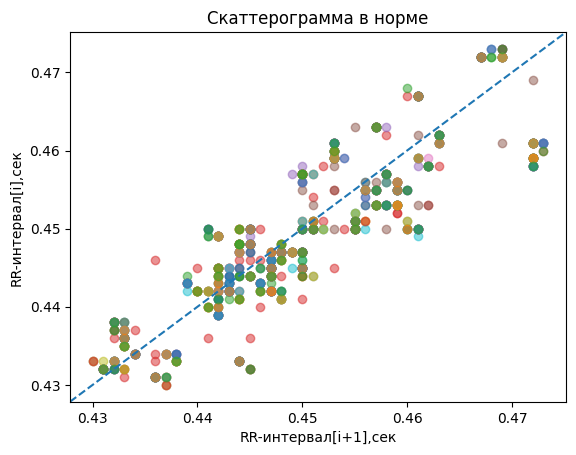

In [41]:
for int in intervals_normal:
    y = np.array(int[0 : 50]) / 1000.0
    x = np.array(int[0 + 1:51]) / 1000.0
    plt.scatter(x, y, alpha=0.5)

plt.axline((0.43, 0.43), slope=1, ls='--')
plt.title('Скаттерограмма в норме')
plt.xlabel('RR-интервал[i+1],сек')
plt.ylabel('RR-интервал[i],сек')
plt.show()

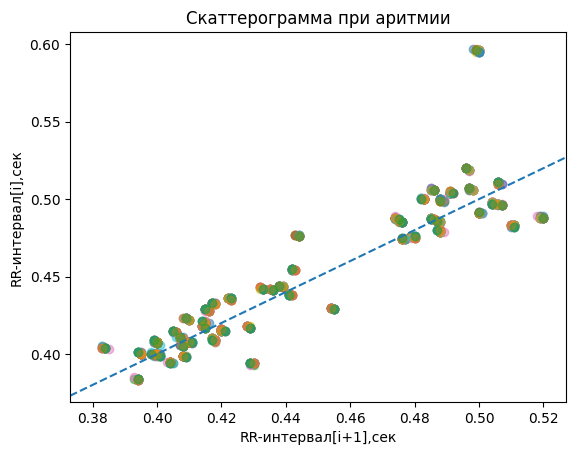

In [46]:
for int in intervals_arrhythmia:
    y = np.array(int[0:50]) / 1000.0
    x = np.array(int[0 + 1:51]) / 1000.0
    plt.scatter(x, y, alpha=0.5)

plt.axline((0.38, 0.38), slope=1, ls='--')
plt.title('Скаттерограмма при аритмии')
plt.xlabel('RR-интервал[i+1],сек')
plt.ylabel('RR-интервал[i],сек')
plt.show()

Как мы можем видеть из полученных графиков, длины интервалов в норме равномерно увеличиваются за данный промежуток времени с 0,43с до 0,47с.

При аритмии равномерное увеличение сменяется резкими скачками до значений 0,6с.

# Хаосграмма (фазовый портрет)

Фазовые портреты ВРС являются основными объектами геометрического нелинейного анализа.


Существует несколько методик их построения. Согласно некоторым <b>по одной оси откладывается абсолютное значение кардиоинтервалов, по другой – прирост их скорости</b>.  Существует так же  прием фиксированной задержки, когда  точка фазового портрета соответствует  значению некоторой переменной  в заданный момент времени, взятой относительно значения той же переменной после фиксированной временной задержки.

На фазовых портретах ВРС мы получаем дополнительную новую информацию из-за накопления повторяющихся слабых ответов сердечнососудистой системы. Заранее спрогнозировать характер или вид, рисунок такой накопленной информации практически невозможно. Тем более, что в рисунке фазового портрета ВРС  учувствует  такой компонент физиологического процесса  как скорость.

Анализируя,  впоследствии,  фазовый портрет ВРС, мы сможем анализировать интегральные целостные процессы, базирующиеся на взаимодействиях между отдельными компонентами ВРС или же между этими компонентами и сопряженными изменениями в других органах и системах. Таким образом, мы получаем дополнительные знания о взаимодействиях колебательных процессов ВРС и их воздействии на другие системы.

Так как функция RR-интервалов у нас задана набором точек, производную будем находить по следующей формуле:
$$ f_i^{'} = {f_{i+1} - f_i \over x_{i+1} - x_i} $$

[0.435 0.433 0.438 0.433 0.432 0.431 0.436 0.433 0.444 0.447]
[-0.002  0.005 -0.005 -0.001 -0.001  0.005 -0.003  0.011  0.003  0.002]


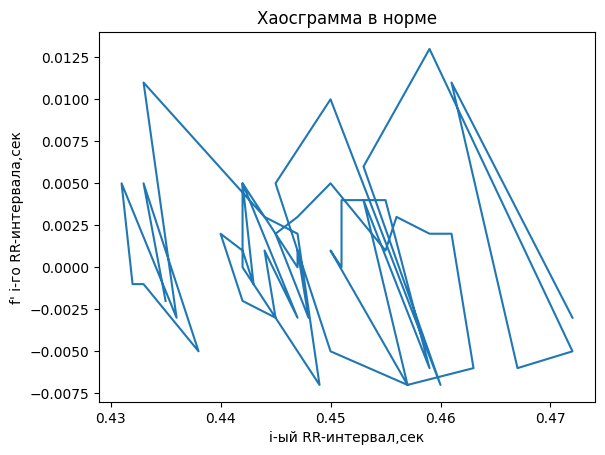

In [33]:
for int in intervals_normal[:1]:
    y = np.array(int[0 : 51]) / 1000.0
    print(y[:10])
    for idx, f in enumerate(y[:50]):
        y[idx] = y[idx + 1] - f
    y = y[:50]
    print(y[:10])
    x = np.array(int[0 : 50]) / 1000.0
    plt.plot(x, y)

plt.title('Хаосграмма в норме')
plt.xlabel('i-ый RR-интервал,сек')
plt.ylabel("f' i-го RR-интервала,сек")
plt.show()

[0.597 0.498 0.489 0.52  0.496 0.506 0.498 0.504 0.491 0.501]
[-0.099 -0.009  0.031 -0.024  0.01  -0.008  0.006 -0.013  0.01  -0.019]


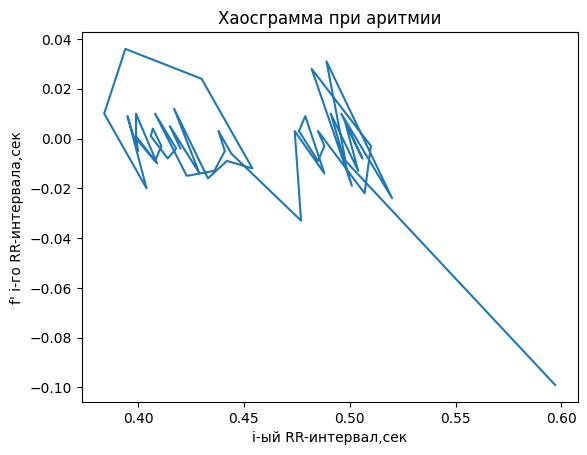

In [34]:
for int in intervals_arrhythmia[:1]:
    y = np.array(int[0 : 51]) / 1000.0
    print(y[:10])
    for idx, f in enumerate(y[:50]):
        y[idx] = y[idx + 1] - f
    y = y[:50]
    print(y[:10])
    x = np.array(int[0 : 50]) / 1000.0
    plt.plot(x, y)

plt.title('Хаосграмма при аритмии')
plt.xlabel('i-ый RR-интервал,сек')
plt.ylabel("f' i-го RR-интервала,сек")
plt.show()